In [405]:
#Import libraries

import pandas as pd
import seaborn as sb
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

df = pd.read_csv(r'C:\Data Analysis Project\Project 04 Correlation in Python\movies.csv')

In [406]:
# Look at the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [407]:
# Check for nulls

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{}-{}%'.format(col,round(pct_missing*100)))
    
    
# So we have nulls in several rows but in pretty negligible percentage except in budget column.

name-0%
rating-1%
genre-0%
year-0%
released-0%
score-0%
votes-0%
director-0%
writer-0%
star-0%
country-0%
budget-28%
gross-2%
company-0%
runtime-0%


I would like to drop all these rows but 28% data is a lot. so let me populate the budget values. 

In [408]:
# first populate the null values in gross column using mean

In [409]:
# findout the mean gross value

mean_gross = df['gross'].mean()

mean_gross

78500541.01778312

In [410]:
# Insert the mean gross value instead of null values

df['gross'].fillna(mean_gross, inplace=True)

In [411]:
# Calculate the average of the 'budget' column, automatically neglecting null values

mean_budget = df['budget'].mean()

print("mean budget value:", mean_budget)


mean budget value: 35589876.192650534


In [412]:
# Now identify the ratio of budget to gross

In [413]:
ratio = mean_gross/mean_budget

ratio

2.2056986260040383

In [414]:
# Populate the 'budget' column where it's null and 'gross' is not null

df.loc[(df['budget'].isnull()) & (df['gross'].notnull()), 'budget'] = df['gross'] / ratio

In [415]:
# Now let us check the null value percentages in all the columns...
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{}-{}%'.format(col,round(pct_missing*100)))
    
# Boom! We did it. 

name-0%
rating-1%
genre-0%
year-0%
released-0%
score-0%
votes-0%
director-0%
writer-0%
star-0%
country-0%
budget-0%
gross-0%
company-0%
runtime-0%


In [416]:
# Now change data types
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [417]:
# Its better if we change gross and budget data types from float to int64, Let us do it

df['budget'] = df['budget'].astype(int)

df['gross'] = df['gross'].astype(int)


In [418]:
# Rename both the columns, release_date and released_year

df = df.rename(columns={'released': 'release_date'})

df.head()


,name,rating,genre,year,release_date,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [419]:
# Extract only release date from this column and remove country since we already have another column with county data in it

df['release_date'] = df['release_date'].str.extract(r'([A-Za-z]+\s\d{1,2},\s\d{4})')

df.head()


,name,rating,genre,year,release_date,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [420]:
df.head()

,name,rating,genre,year,release_date,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [421]:
# Drop duplicates if any

df.drop_duplicates()

df.head()

,name,rating,genre,year,release_date,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [422]:
# Now let us delete false information before populating nulls.
# A movie gross income can never be negative.so let us see if we have any negative values
negative_values = df[df['gross'] < 0]

# To check if there are any negative values
if not negative_values.empty:
    print("There are negative values in the column.")
else:
    print("No negative values found.")

There are negative values in the column.


In [423]:
# Remove the rows with -ve gross values

df = df[df['gross'] >= 0]

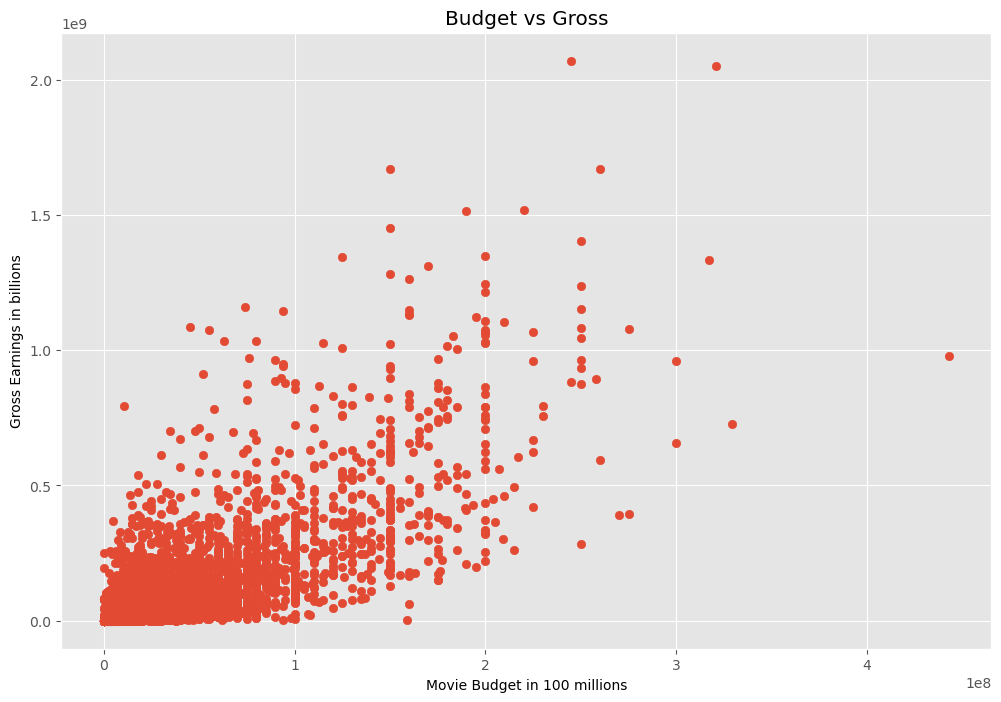

In [424]:
# Let us use matplotlib now to correlate budget and gross earnings

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross')

plt.xlabel('Movie Budget in 100 millions')

plt.ylabel('Gross Earnings in billions')

plt.show()

In [425]:
df_sorted = df.sort_values(by='gross', ascending=False)

df_sorted.head()


,name,rating,genre,year,release_date,score,votes,director,writer,star,country,budget,gross,company,runtime
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0
7480,The Lion King,PG,Animation,2019,"July 19, 2019",6.9,222000.0,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118.0
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015",7.0,593000.0,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124.0
6043,The Avengers,PG-13,Action,2012,"May 4, 2012",8.0,1300000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143.0


<Axes: xlabel='budget', ylabel='gross'>

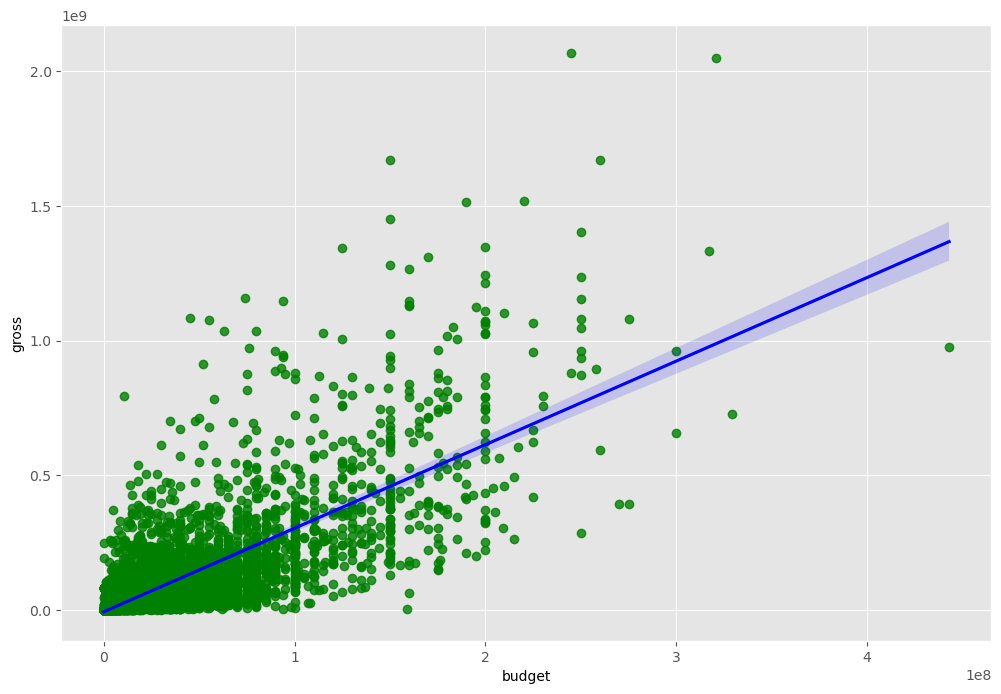

In [426]:
sb.regplot(x='budget', y='gross', data=df, scatter_kws={'color':'green'}, line_kws={'color':'blue'})

In [427]:
# Let us find the correlation betwen budget and gross

correlation = df['budget'].corr(df['gross'])
print(f'The correlation betwen budget and gross is {round(correlation,2)}')

#The default correlation method used is pearson correlation

The correlation betwen budget and gross is 0.76


In [428]:
# There are types of correlations. Let us now see kendall correlation

kendall_correlation = df['budget'].corr(df['gross'],method = 'kendall')
print(f'The kendall correlation betwen budget and gross is {round(kendall_correlation,2)}')

The kendall correlation betwen budget and gross is 0.63


In [429]:
#Let us now see spearman correlation

spearman_correlation = df['budget'].corr(df['gross'],method = 'spearman')
print(f'The spearman correlation betwen budget and gross is {round(spearman_correlation,2)}')

The spearman correlation betwen budget and gross is 0.79


C:\Users\saich\AppData\Local\Temp\ipykernel_6316\3516699745.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr() # we can add method based on our requirement


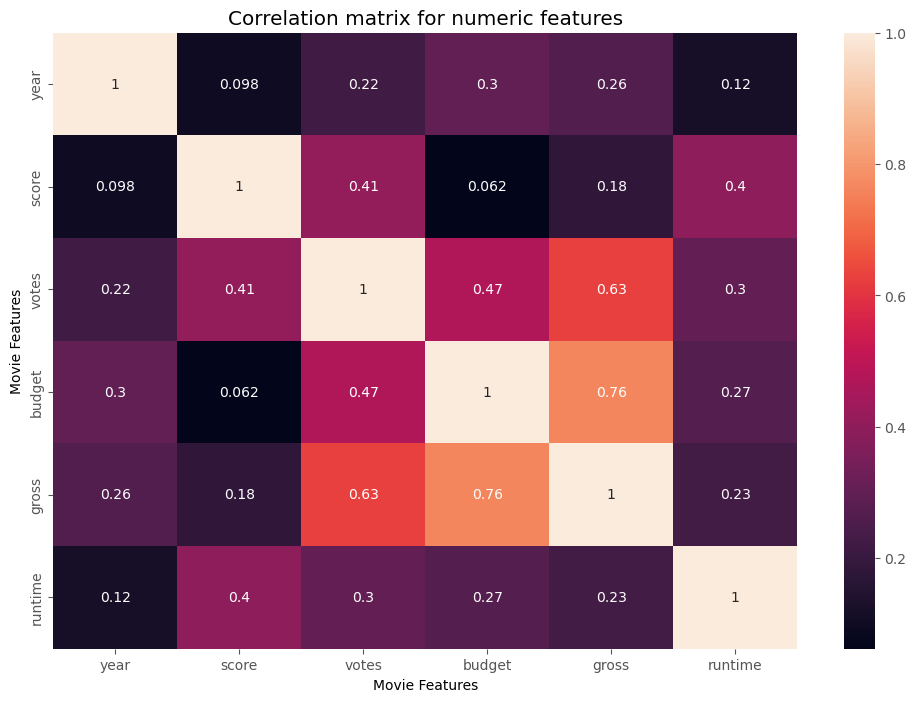

Highest correlated movie features are ('budget', 'gross') with a value of 0.76


In [430]:
correlation = df.corr() # we can add method based on our requirement

sb.heatmap(correlation, annot = True)

plt.title('Correlation matrix for numeric features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

# let us findout the best correlated features

# Unstack the matrix to turn it into a Series
correlation_series = correlation.unstack()

# Remove self-correlations by filtering out pairs where the indices are the same
filtered_corr = correlation_series[correlation_series.index.get_level_values(0) != correlation_series.index.get_level_values(1)]

#Find the highest correlated pair
max_corr = filtered_corr.max()
max_corr_pair = filtered_corr.idxmax()

print(f"Highest correlated movie features are {max_corr_pair} with a value of {round(max_corr,2)}")



In [431]:
df_numerized = df

for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()

,name,rating,genre,year,release_date,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6585,6,6,1980,1487,8.4,927000.0,2589,4014,1047,54,19000000,46998772,2319,146.0
1,5571,6,1,1980,1288,5.8,65000.0,2269,1632,327,55,4500000,58853106,731,104.0
2,5140,4,0,1980,1542,8.7,1200000.0,1111,2567,1745,55,18000000,538375067,1540,124.0
3,286,4,4,1980,1288,7.7,221000.0,1301,2000,2246,55,3500000,83453539,1812,88.0
4,1025,6,4,1980,1337,7.3,108000.0,1054,521,410,55,6000000,39846344,1777,98.0


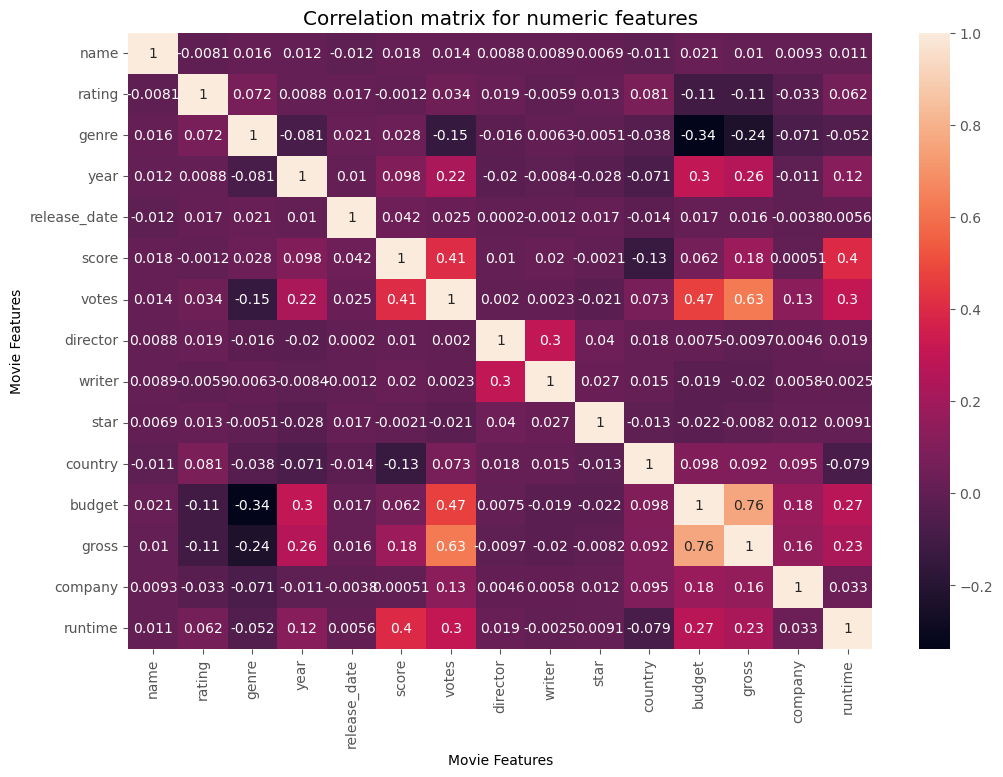

In [432]:
correlation = df_numerized.corr() # we can add method based on our requirement

sb.heatmap(correlation, annot = True)

plt.title('Correlation matrix for numeric features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()


In [433]:
correlation = df_numerized.corr()

# let us findout the best correlated features

correlation_series = correlation.unstack()

filtered_corr = correlation_series[correlation_series.index.get_level_values(0) != correlation_series.index.get_level_values(1)]

max_corr = filtered_corr.max()
max_corr_pair = filtered_corr.idxmax()

print(f"Highest correlated movie features are {max_corr_pair} with a value of {round(max_corr,2)}")



Highest correlated movie features are ('budget', 'gross') with a value of 0.76


In [434]:
# Let us findout the least correlated features
correlation = df.corr()

correlation_series = correlation_matrix.unstack()

filtered_corr = correlation_series[correlation_series.index.get_level_values(0) != correlation_series.index.get_level_values(1)]

min_corr = filtered_corr.min()
min_corr_pair = filtered_corr.idxmin()

print(f"Least correlated movie features are {min_corr_pair} with a value of {round(min_corr,2)}")



Least correlated movie features are ('score', 'budget') with a value of 0.06
